# House Prices - Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Introduction

>"In God we trust. All others must bring data." – **W. Edwards Deming**

In today's fiercely competitive real estate market, pinpointing house prices with precision is vital for buyers, sellers, and investors alike. The Kaggle competition "House Prices - Advanced Regression Techniques" offers a comprehensive dataset of housing attributes, challenging data scientists to build robust models for predicting property sale prices. By employing sophisticated regression methods and innovative feature engineering, we strive to reveal the patterns and elements that drive house prices. This analysis walks you through a systematic process, from data preprocessing to model evaluation, ultimately empowering us to make well-informed predictions and gain valuable insights into the housing market.

## Approach

#### 1. Basic Data Exploration
- Import the data
- Look at the summary statistics
- Evaluate Null Values
- Basic Data Exploration

#### 2. Data Preprocessing
**a. Handle Missing Values:**
- Identify columns with missing values.
- Impute missing numerical values with the median.
- Impute missing categorical values with 'None'.

**b. Encode Categorical Variables:**
-  Apply one-hot encoding for nominal categorical variables.
- Normalize/Standardize Numerical Features:
- Standardize numerical features to have a mean of 0 and a standard deviation of 1.

#### 3. Exploratory Data Analysis (EDA)
**a. Visualize Distributions and Relationships:**
- Create histograms, box plots, and scatter plots for numerical variables.
- Use bar plots for categorical variables.

**b. Correlation Analysis:**
- Compute and visualize the correlation matrix using a heatmap to uncover relationships between numerical features.

**c. Analyze the Target Variable (SalePrice):**
- Examine the distribution of SalePrice and apply a log transformation to address skewness.

#### 4. Feature Engineering
**a. Create New Features:**
- TotalHouseArea: Combine above-ground living area (GrLivArea) and basement area (TotalBsmtSF).
- TotalBathrooms: Sum up all full and half bathrooms across different levels.
- HouseAge: Calculate the difference between the year sold (YrSold) and the year built (YearBuilt).
- RemodelAge: Calculate the difference between the year sold (YrSold) and the year of the last remodel (YearRemodAdd).

**b. Handle Interaction Terms:**
- Consider interaction terms between features that may collectively influence SalePrice.

**c. Feature Selection:**
- Use tree-based feature importance to identify the most relevant features.

#### 5. Model Building
**a. Split Data:**
- Divide the dataset into training and validation sets, typically handled during cross-validation.

**b. Train Multiple Models:**
- Train a variety of models including Linear Regression, Random Forest, and Gradient Boosting Machines (GBM).

**c. Hyperparameter Tuning:**
- Use default hyperparameters for initial evaluations.

#### 6. Model Evaluation
**a. Evaluate Model Performance:**
- Use RMSE to assess model performance and perform cross-validation to ensure stability.

**b. Model Interpretation:**
- Analyze feature importance, particularly for tree-based models.

**c. Ensemble Methods:**
- Select the best-performing model (Gradient Boosting Regressor) based on RMSE.

#### 7. Submission

**a. Prepare Test Data:**
- Apply the same preprocessing and feature engineering steps to the test data.

**b. Generate Predictions:**
- Use the trained Gradient Boosting Regressor to make predictions on the test data.

**c. Create Submission File:**
- Format the predictions as required by the Kaggle competition and prepare the submission file.

>Notebook inspiration [Housing Prices Example](https://www.kaggle.com/code/kenjee/housing-prices-example-with-video-walkthrough)

## Prerequisites
Here is the comprehensive list of imports used in the analysis:

In [ ]:
!pip install -U kaleido

In [1]:
#import relevant packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from IPython.display import display, HTML

### 1. Basic Data Exploration

In [2]:
# Load datasets
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Display the first few rows of the training dataset
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.shape

(1460, 81)

In [4]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

### 1.1 Numerical Data

In [5]:
numerical_features = train_df.select_dtypes(include=[np.number])
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Summary statistics for numerical features
numerical_features = train_df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### 1.2 Categorical Data

In [7]:
# Summary statistics for categorical features
categorical_features = train_df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


### 1.3 Null Values in Dataset

In [8]:
# Null values in the dataset
null_values = train_df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


### 1.4 Missing Values in Dataset

In [9]:
# Exploring rows with missing values
rows_with_missing_values = train_df[train_df.isnull().any(axis=1)]
html_rows_with_missing_values = create_scrollable_table(rows_with_missing_values.head(), 'rows_with_missing_values', 'Rows with missing values')

display(HTML(html_rows_with_missing_values))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.5 Explore the columns

In [10]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 1.6 Explore the dependent variable
- Should it be normalized?
- Normalize Dependent Variable

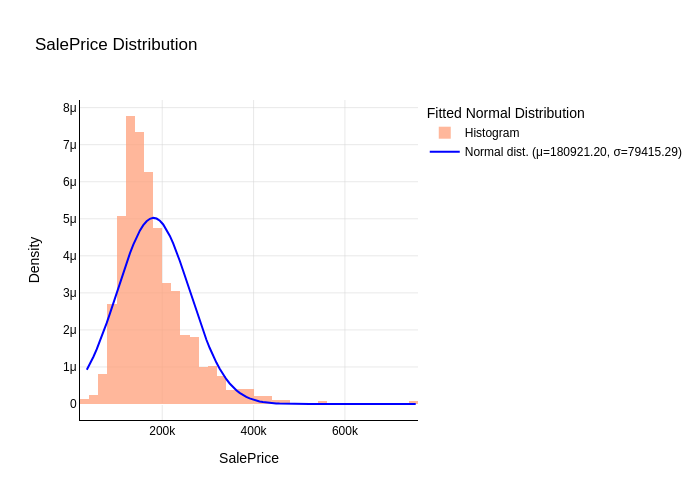

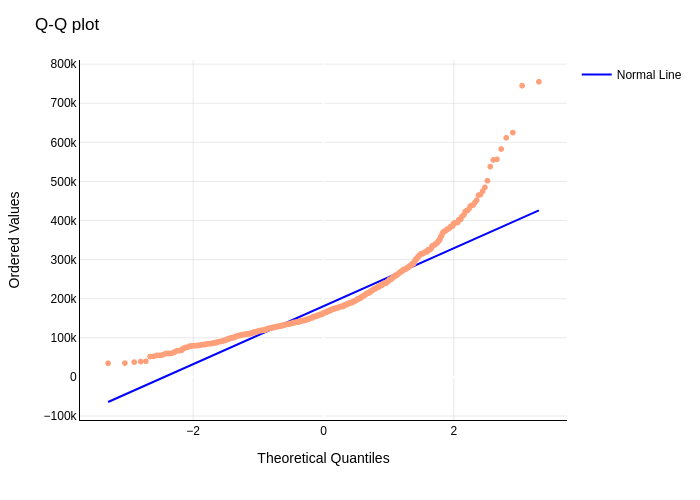

In [11]:
# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(train_df['SalePrice'])

# Create a histogram of the SalePrice column
hist_data = go.Histogram(
    x=train_df['SalePrice'],
    nbinsx=50,
    name="Histogram",
    opacity=0.75,
    histnorm='probability density',
    marker=dict(color='lightsalmon')  # Change color to lightsalmon
)

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(train_df['SalePrice'].min(), train_df['SalePrice'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(
    x=x_norm,
    y=y_norm,
    mode="lines",
    name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})",
    line=dict(color="blue")  # Change line color to blue
)

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="SalePrice Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    # Adjusting grid and axis line visibility
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)',
    font=dict(color='black')  # Adjust font color to black for better readability
)

# Create a Q-Q plot
qq_data = stats.probplot(train_df['SalePrice'], dist="norm")
qq_fig = px.scatter(
    x=qq_data[0][0],
    y=qq_data[0][1],
    labels={'x': 'Theoretical Quantiles', 'y': 'Ordered Values'},
    color_discrete_sequence=["lightsalmon"]  # Change color to lightsalmon
)

# Update layout for Q-Q plot
qq_fig.update_layout(
    title="Q-Q plot",
    # Adjusting grid and axis line visibility
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)',
    font=dict(color='black')  # Adjust font color to black
)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Add the line of best fit to the Q-Q plot
line_data = go.Scatter(
    x=line_x,
    y=line_y,
    mode="lines",
    name="Normal Line",
    line=dict(color="blue")  # Change line color to blue
)

# Update the Q-Q plot with the normal line
qq_fig.add_trace(line_data)

# Show the plots
#fig.show()
#qq_fig.show()

# Save the Plotly figures as static PNG images
fig.write_image("saleprice_distribution.png", engine="kaleido")
qq_fig.write_image("qqplot.png", engine="kaleido")


# (Optional: Display the images in the notebook if you're working in Kaggle)
from IPython.display import Image
display(Image("saleprice_distribution.png"))
display(Image("qqplot.png"))

#### Interpretation of Plots

#### SalePrice Distribution:

- The histogram shows the SalePrice is right-skewed (tail on the right). This is common with house prices as there are typically fewer extremely expensive houses.
- The normal distribution (blue curve) doesn't fit the data well, confirming the non-normality.

#### Q-Q Plot:

- The points deviate significantly from the straight blue line, especially in the upper tail. This further emphasizes that SalePrice does not follow a normal distribution.
- The upward curve indicates the right skew we saw in the histogram.

### 1.7 Basic Data Exploration
**Next, let's try to address the following questions through the data in hand:**

- How do various dwelling types distribute, and how are they related to sale prices?
- Is there an effect of zoning on sale prices?
- What impact do different types of street and alley access have on sale prices?
- What is the average sale price based on property shape?
- Is there a correlation between the age of a property and its sale price?
- Is there a correlation between the living area size and sale price?
- Do sale prices fluctuate from year to year?

#### 1.7.1 Dwelling Types Distribute Relation to Sale Price 

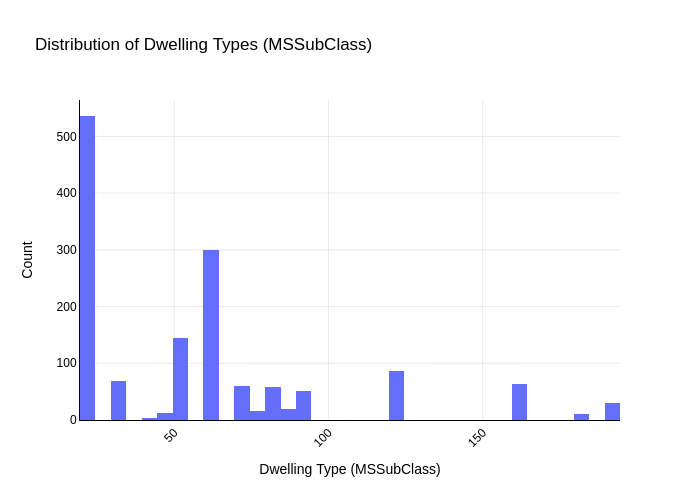

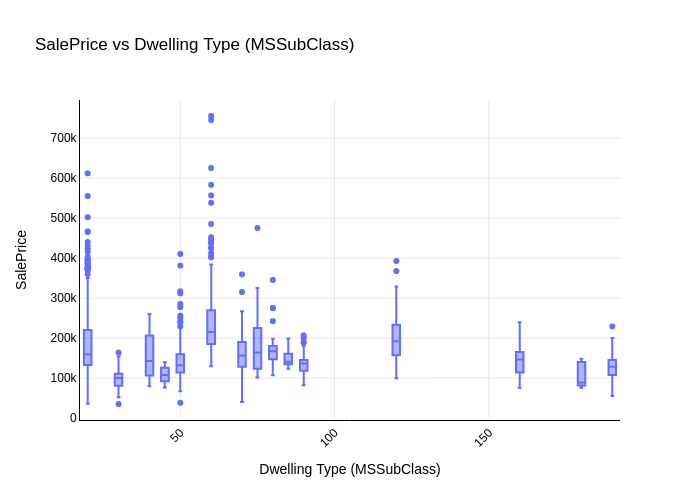

In [12]:
# Bar plot for MSSubClass distribution
fig_bar = px.histogram(train_df, x='MSSubClass', title='Distribution of Dwelling Types (MSSubClass)')
fig_bar.update_layout(
    xaxis_title='Dwelling Type (MSSubClass)',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    font=dict(color='black'),  
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_bar.show()

# Save bar plot as a static image
fig_bar.write_image("mssubclass_distribution_bar.png", engine="kaleido")

# Box plot for MSSubClass vs SalePrice
fig_box = px.box(train_df, x='MSSubClass', y='SalePrice', title='SalePrice vs Dwelling Type (MSSubClass)')
fig_box.update_layout(
    xaxis_title='Dwelling Type (MSSubClass)',
    yaxis_title='SalePrice',
    xaxis_tickangle=-45,
    font=dict(color='black'),
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_box.show()

# Save box plot as a static image
fig_box.write_image("saleprice_vs_mssubclass_box.png", engine="kaleido")


# (Optional: Display the images in the notebook if you're working in Kaggle)
from IPython.display import Image
display(Image("mssubclass_distribution_bar.png"))
display(Image("saleprice_vs_mssubclass_box.png"))

>**1. Distribution of Dwelling Types (MSSubClass)**
>- The bar plot illustrates the frequency of each dwelling type in the dataset, providing insight into how common each type is among the properties.
>
>**2. SalePrice vs Dwelling Type (MSSubClass)**
>- The box plot depicts the distribution of sale prices for each dwelling type, offering an understanding of how sale prices vary across different types of dwellings.

#### 1.7.2 Effect of Zoning on Sale Prices

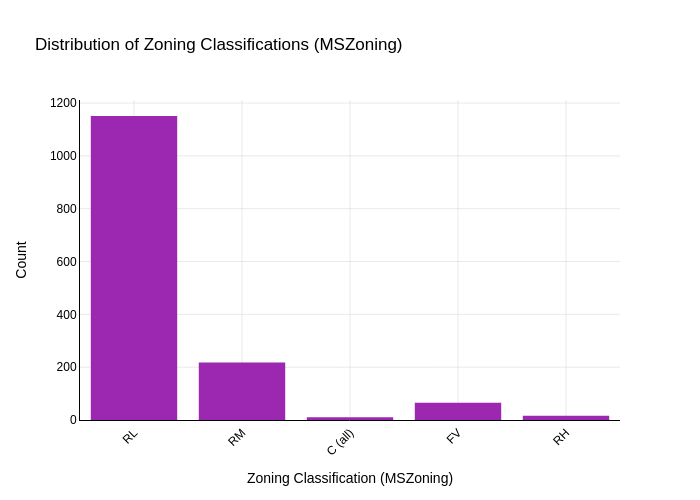

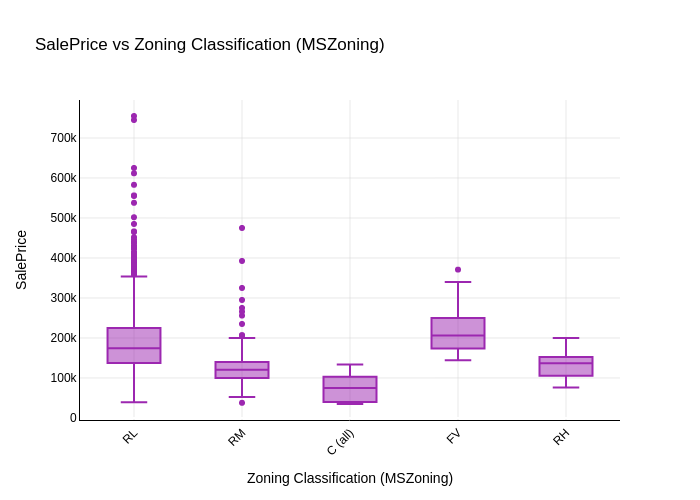

In [13]:
# Bar plot for MSZoning distribution
fig_bar_zoning = px.histogram(train_df, x='MSZoning', title='Distribution of Zoning Classifications (MSZoning)', color_discrete_sequence=['rgb(156, 39, 176)'])
fig_bar_zoning.update_layout(
    xaxis_title='Zoning Classification (MSZoning)',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    font=dict(color='black'),  # Set font color to black
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_bar_zoning.show()

# Save bar plot as a static image
fig_bar_zoning.write_image("mszoning_distribution_bar.png", engine="kaleido")

# Box plot for MSZoning vs SalePrice
fig_box_zoning = px.box(train_df, x='MSZoning', y='SalePrice', title='SalePrice vs Zoning Classification (MSZoning)', color_discrete_sequence=['rgb(156, 39, 176)'])
fig_box_zoning.update_layout(
    xaxis_title='Zoning Classification (MSZoning)',
    yaxis_title='SalePrice',
    xaxis_tickangle=-45,
    font=dict(color='black'),  # Set font color to black
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_box_zoning.show()

# Save box plot as a static image
fig_box_zoning.write_image("saleprice_vs_mszoning_box.png", engine="kaleido")


# (Optional: Display the images in the notebook if you're working in Kaggle)
from IPython.display import Image
display(Image("mszoning_distribution_bar.png"))
display(Image("saleprice_vs_mszoning_box.png"))

>**1. Distribution of Zoning Classifications (MSZoning)**
>- The bar plot illustrates the frequency of each zoning classification in the dataset, offering insight into how common each zoning type is among the properties.
>
>**2. SalePrice vs. Zoning Classification (MSZoning)**
>- The box plot depicts the distribution of sale prices for each zoning classification, helping to understand how sale prices vary across different zoning categories.

#### 1.7.3 Impact of different types of street and alley access on Sale Prices

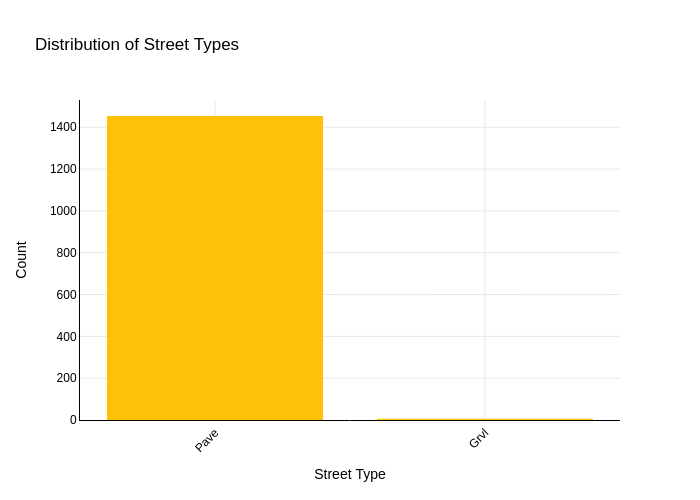

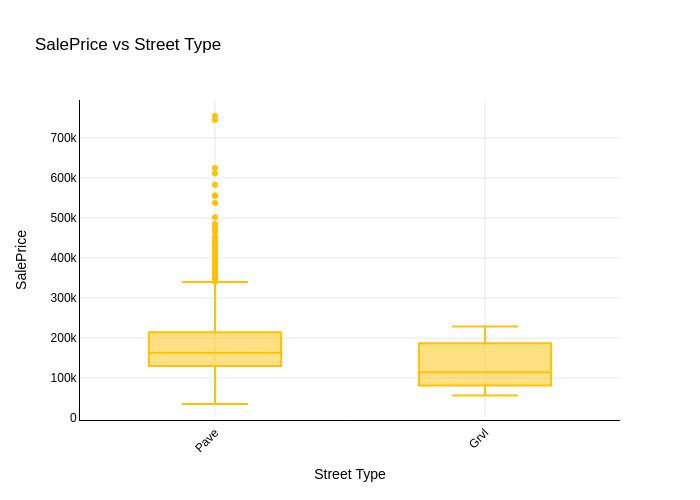

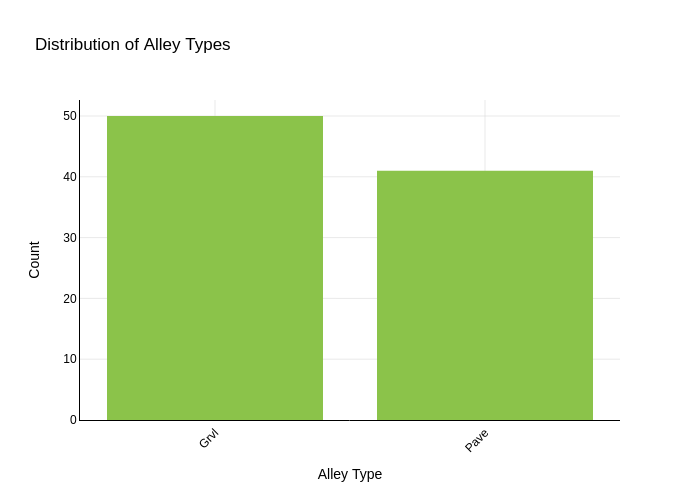

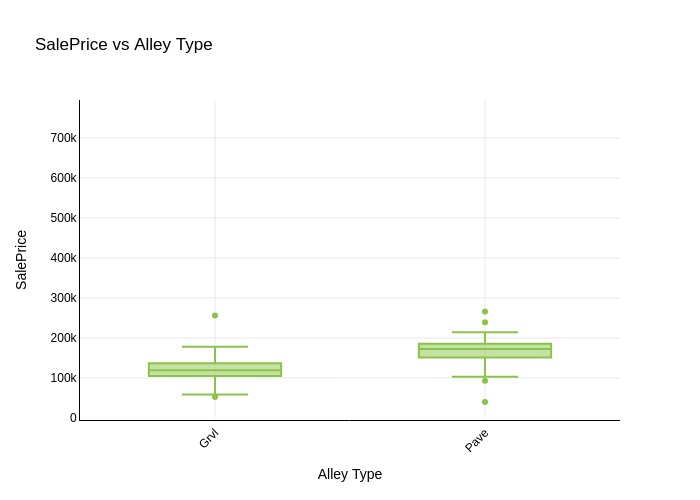

In [14]:
# Bar plot for Street distribution
fig_bar_street = px.histogram(train_df, x='Street', title='Distribution of Street Types', color_discrete_sequence=['rgb(255, 193, 7)'])
fig_bar_street.update_layout(
    xaxis_title='Street Type',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    font=dict(color='black'),  # Set font color to black
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_bar_street.show()

# Save bar plot as a static image
fig_bar_street.write_image("street_distribution_bar.png", engine="kaleido")

# Box plot for Street vs SalePrice
fig_box_street = px.box(train_df, x='Street', y='SalePrice', title='SalePrice vs Street Type', color_discrete_sequence=['rgb(255, 193, 7)'])
fig_box_street.update_layout(
    xaxis_title='Street Type',
    yaxis_title='SalePrice',
    xaxis_tickangle=-45,
    font=dict(color='black'),  # Set font color to black
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_box_street.show()

# Save box plot as a static image
fig_box_street.write_image("saleprice_vs_street_box.png", engine="kaleido")

# Bar plot for Alley distribution
fig_bar_alley = px.histogram(train_df, x='Alley', title='Distribution of Alley Types', color_discrete_sequence=['rgb(139, 195, 74)'])
fig_bar_alley.update_layout(
    xaxis_title='Alley Type',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    font=dict(color='black'),  # Set font color to black
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_bar_alley.show()

# Save bar plot as a static image
fig_bar_alley.write_image("alley_distribution_bar.png", engine="kaleido")

# Box plot for Alley vs SalePrice
fig_box_alley = px.box(train_df, x='Alley', y='SalePrice', title='SalePrice vs Alley Type', color_discrete_sequence=['rgb(139, 195, 74)'])
fig_box_alley.update_layout(
    xaxis_title='Alley Type',
    yaxis_title='SalePrice',
    xaxis_tickangle=-45,
    font=dict(color='black'),  # Set font color to black
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_box_alley.show()

# Save box plot as a static image
fig_box_alley.write_image("saleprice_vs_alley_box.png", engine="kaleido")


# (Optional: Display the images in the notebook if you're working in Kaggle)
from IPython.display import Image
display(Image("street_distribution_bar.png"))
display(Image("saleprice_vs_street_box.png"))
display(Image("alley_distribution_bar.png"))
display(Image("saleprice_vs_alley_box.png"))

>**1. Distribution of Street Types**
>- The bar plot highlights the frequency of gravel and paved streets in the dataset, revealing that most properties have paved streets.
>
>**2. SalePrice vs. Street Type**
>- The box plot illustrates the distribution of sale prices for properties with gravel and paved streets, showing that properties with paved streets generally command higher sale prices.
>
>**3. Distribution of Alley Types**
>- The bar plot shows the frequency of gravel, paved, and no alley types in the dataset, with most properties lacking alley access.
>
>**4. SalePrice vs. Alley Type**
>- The box plot depicts the distribution of sale prices based on alley types, indicating that properties without alley access typically have higher sale prices than those with gravel or paved alley access.

#### 1.7.3 Average Sale Price based on Property Shape

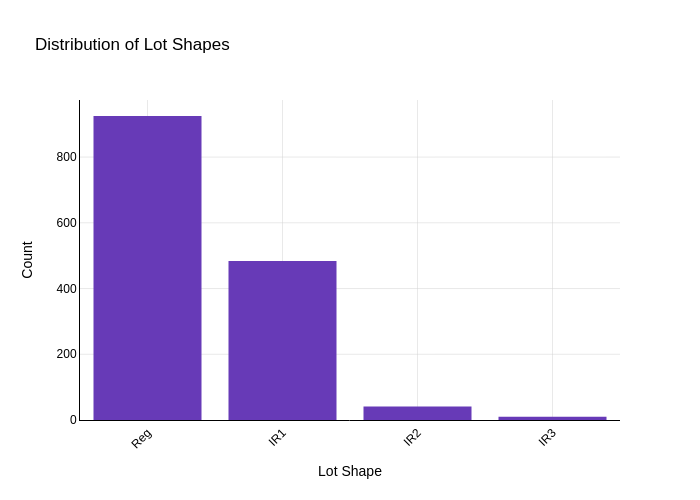

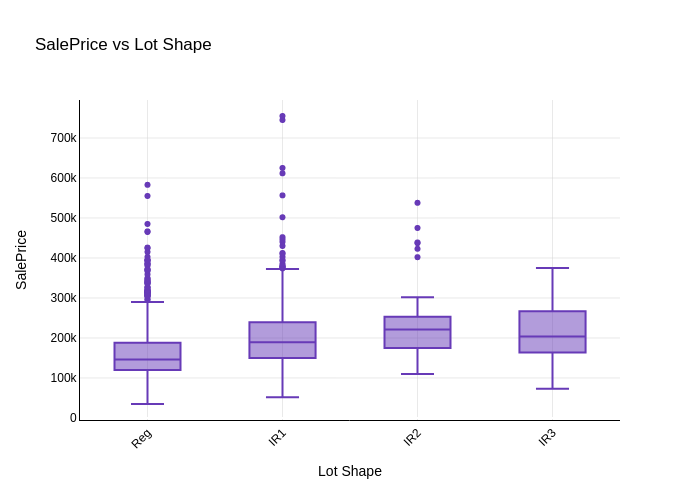

In [15]:
# Bar plot for LotShape distribution
fig_bar_lotshape = px.histogram(train_df, x='LotShape', title='Distribution of Lot Shapes', color_discrete_sequence=['rgb(103, 58, 183)'])
fig_bar_lotshape.update_layout(
    xaxis_title='Lot Shape',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    font=dict(color='black'),  # Set font color to black
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_bar_lotshape.show()

# Save bar plot as a static image
fig_bar_lotshape.write_image("lotshape_distribution_bar.png", engine="kaleido")

# Box plot for LotShape vs SalePrice
fig_box_lotshape = px.box(train_df, x='LotShape', y='SalePrice', title='SalePrice vs Lot Shape', color_discrete_sequence=['rgb(103, 58, 183)'])
fig_box_lotshape.update_layout(
    xaxis_title='Lot Shape',
    yaxis_title='SalePrice',
    xaxis_tickangle=-45,
    font=dict(color='black'),  # Set font color to black
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_box_lotshape.show()

# Save box plot as a static image
fig_box_lotshape.write_image("saleprice_vs_lotshape_box.png", engine="kaleido")


# (Optional: Display the images in the notebook if you're working in Kaggle)
from IPython.display import Image
display(Image("lotshape_distribution_bar.png"))
display(Image("saleprice_vs_lotshape_box.png"))

>**1. Distribution of Lot Shapes**
>- The bar plot illustrates the frequency of various lot shapes in the dataset, showing that regular (Reg) lot shapes are the most common, followed by slightly irregular (IR1) shapes.
>
>**2. SalePrice vs. Lot Shape**
>- The box plot depicts the distribution of sale prices for different lot shapes, indicating that regular (Reg) lot shapes generally have higher sale prices compared to irregular shapes.

#### 1.7.4 Correlation between the Age of a Property and Sale Proces

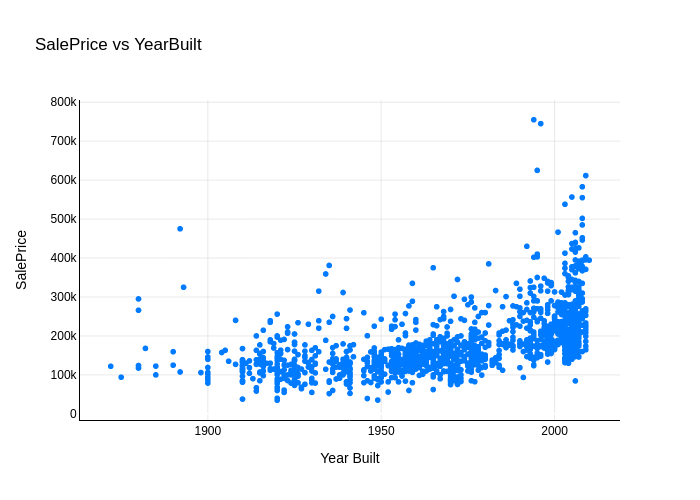

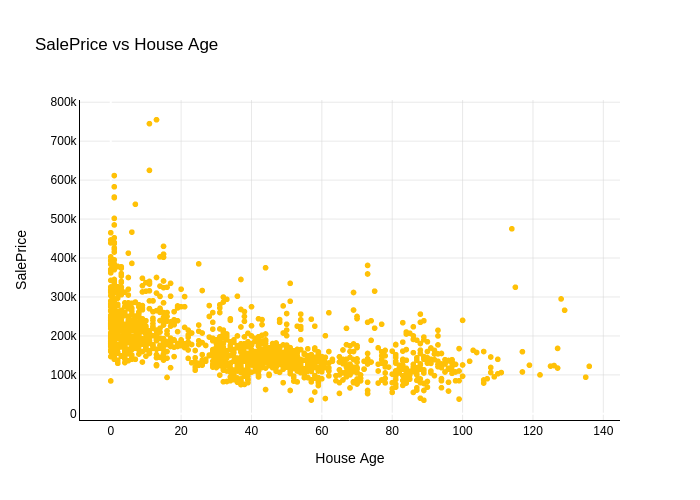

In [16]:
# Create a new column for the age of the property
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

# Scatter plot for YearBuilt vs SalePrice
fig_scatter_yearbuilt = px.scatter(train_df, x='YearBuilt', y='SalePrice', title='SalePrice vs YearBuilt')
fig_scatter_yearbuilt.update_traces(marker=dict(color='rgb(0, 123, 255)'))
fig_scatter_yearbuilt.update_layout(
    xaxis_title='Year Built',
    yaxis_title='SalePrice',
    font=dict(color='black'),  # Set font color to black
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_scatter_yearbuilt.show()

# Save YearBuilt scatter plot as a static image
fig_scatter_yearbuilt.write_image("saleprice_vs_yearbuilt_scatter.png", engine="kaleido")

# Scatter plot for HouseAge vs SalePrice
fig_scatter_houseage = px.scatter(train_df, x='HouseAge', y='SalePrice', title='SalePrice vs House Age')
fig_scatter_houseage.update_traces(marker=dict(color='rgb(255, 193, 7)'))
fig_scatter_houseage.update_layout(
    xaxis_title='House Age',
    yaxis_title='SalePrice',
    font=dict(color='black'),  # Set font color to black
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_scatter_houseage.show()

# Save HouseAge scatter plot as a static image
fig_scatter_houseage.write_image("saleprice_vs_houseage_scatter.png", engine="kaleido")

# Previous lines to show the plots are commented out (Optional: Display the images in the notebook if you're working in Kaggle)
# fig_scatter_yearbuilt.show()
# fig_scatter_houseage.show()

from IPython.display import Image
display(Image("saleprice_vs_yearbuilt_scatter.png"))
display(Image("saleprice_vs_houseage_scatter.png"))

>**1. SalePrice vs. Year Built**
>- The scatter plot illustrates the relationship between the year a property was built and its sale price. Typically, newer properties command higher sale prices compared to older ones.
>
>**2. SalePrice vs. House Age**
>- The scatter plot depicts the relationship between a property's age and its sale price. There is a negative correlation, indicating that as a property ages, its sale price tends to decrease.

#### 1.7.6 Correlation between the Living Area Size and Sale Prices

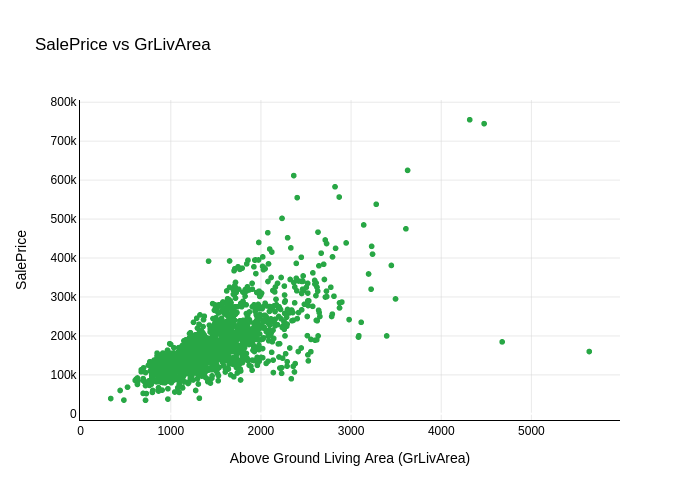

In [17]:
# Scatter plot for GrLivArea vs SalePrice
fig_scatter_grlivarea = px.scatter(train_df, x='GrLivArea', y='SalePrice', title='SalePrice vs GrLivArea')
fig_scatter_grlivarea.update_traces(marker=dict(color='rgb(40, 167, 69)'))
fig_scatter_grlivarea.update_layout(
    xaxis_title='Above Ground Living Area (GrLivArea)',
    yaxis_title='SalePrice',
    font=dict(color='black'),  # Set font color to black
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_scatter_grlivarea.show()

# Save the scatter plot as a static image
fig_scatter_grlivarea.write_image("saleprice_vs_grlivarea_scatter.png", engine="kaleido")


# (Optional: Display the image in the notebook if you're working in Kaggle)
from IPython.display import Image
display(Image("saleprice_vs_grlivarea_scatter.png"))

>**SalePrice vs. GrLivArea**
>- The scatter plot highlights a clear positive correlation between above-ground living area size (GrLivArea) and sale price (SalePrice). Generally, properties with larger living areas tend to fetch higher sale prices.

#### 1.7.7 Sale Prices Fluctuation Y-Y

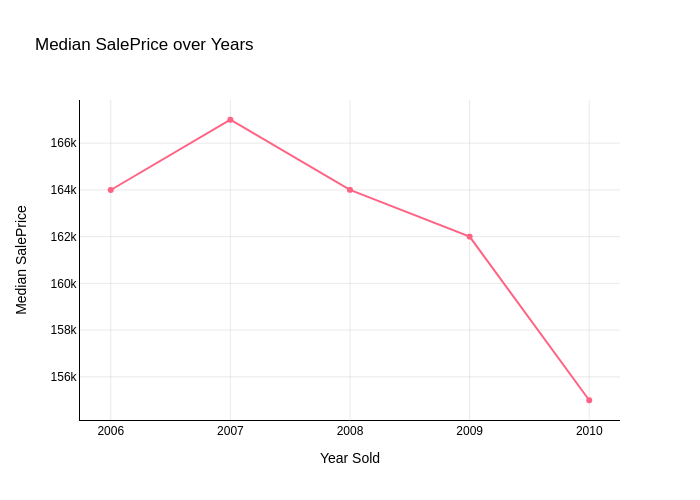

In [18]:
import plotly.express as px

# Calculate the median SalePrice for each year
median_saleprice_per_year = train_df.groupby('YrSold')['SalePrice'].median().reset_index()

# Line plot for Median SalePrice over different years
fig_line_saleprice = px.line(median_saleprice_per_year, x='YrSold', y='SalePrice', title='Median SalePrice over Years', markers=True, line_shape='linear')
fig_line_saleprice.update_traces(line=dict(color='rgb(255, 99, 132)'))
fig_line_saleprice.update_layout(
    xaxis_title='Year Sold',
    yaxis_title='Median SalePrice',
    font=dict(color='black'),  # Set font color to black
    xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
    plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
    paper_bgcolor='rgba(255, 255, 255, 1)'
)
#fig_line_saleprice.show()

# Save the scatter plot as a static image
fig_line_saleprice.write_image("saleprice_fluctuation.png", engine="kaleido")


# (Optional: Display the image in the notebook if you're working in Kaggle)
from IPython.display import Image
display(Image("saleprice_fluctuation.png"))

>**Median SalePrice Over the Years**
>- The line plot illustrates the trend of median sale prices from 2006 to 2010. There is a noticeable decline in median sale prices during this period, particularly after 2007, likely due to the economic downturn at that time.

## 2. Data Processing

### 2.1 Handling Missing Values

In [19]:
# Step 2a: Handle Missing Values
# Identify columns with missing values
missing_values_before = train_df.isnull().sum()
missing_values_before = missing_values_before[missing_values_before > 0]

# Display missing values before imputation
scrollable_table_before_html = create_scrollable_table(missing_values_before.to_frame(name='Missing Values Before Imputation'), "missing-values-before-table", "Missing Values Before Imputation")
display(HTML(scrollable_table_before_html))

# Impute missing numerical values with the median
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[num_cols] = train_df[num_cols].apply(lambda x: x.fillna(x.median()), axis=0)

# Impute missing categorical values with 'None'
cat_cols = train_df.select_dtypes(include=['object']).columns
train_df[cat_cols] = train_df[cat_cols].apply(lambda x: x.fillna('None'), axis=0)

# Display the dataframe of missing values after imputation
missing_values_after = train_df.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0]

# Create scrollable table for after imputation
#scrollable_table_after_html = create_scrollable_table(missing_values_after.to_frame(name='Missing Values After Imputation'), "missing-values-after-table", "Missing Values After Imputation")
#display(HTML(scrollable_table_after_html))

display("All Missing Values Handled!")

,Missing Values Before Imputation
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


'All Missing Values Handled!'

### 2.2 Encode Categorical Variables:

In [ ]:
# Step 2b: Encode Categorical Variables
train_df = pd.get_dummies(train_df, drop_first=True)

# Normalize/Standardize Numerical Features
scaler = StandardScaler()
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

# Display the preprocessed data sample
scrollable_table_sample_html = create_scrollable_table(train_df.head(), "preprocessed-data-sample-table", "Preprocessed Data Sample")
display(HTML(scrollable_table_sample_html))

>The preprocessing steps have been successfully completed, including the handling of missing values, encoding of categorical variables, and standardization of numerical features. The data is now preprocessed and ready for further analysis.

## 3. Exploratory Data Analysis (EDA)
### 3.1 Visualize Distributions and Relationships
- We will create histograms, box plots, and scatter plots for numerical variables.
- We will use bar plots for categorical variables.

In [ ]:
# Step 3a: Visualize Distributions and Relationships
# Create histograms, box plots, and scatter plots for numerical variables
# Plotting histograms for selected numerical features
num_features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'SalePrice']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### 3.2 Correlation Analysis
- Let's Compute and visualize the correlation matrix using a heatmap to uncover relationships between numerical features.

In [ ]:
# Step 3b: Correlation Analysis
# Compute and visualize the correlation matrix using a heatmap
correlation_matrix = train_df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 3.3 Analyze the Target Variable (SalePrice)
- Let's Eexamine the distribution of SalePrice and apply a log transformation to address skewness.

In [ ]:
# Step 3c: Analyze the Target Variable (SalePrice)
# Examine the distribution of SalePrice and apply a log transformation to address skewness
plt.figure(figsize=(8, 6))
sns.histplot(np.log1p(train_df['SalePrice']), kde=True)
plt.title('Log-Transformed Distribution of SalePrice')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.show()

>**1.Distributions of Numerical Variables**
>- Histograms for LotArea, GrLivArea, TotalBsmtSF, and SalePrice illustrate the distribution and highlight the presence of outliers in these features.
>
>**2. Correlation Analysis**
>- A heatmap of the correlation matrix uncovers relationships between numerical features, showing strong correlations, such as between GrLivArea and TotalBsmtSF with SalePrice.
>
>**3. Analysis of the Target Variable (SalePrice)**
>- The log-transformed distribution of SalePrice demonstrates that log transformation helps address skewness, making the data more normally distributed.

## 4. Feature Engineering
### a. Create New Features
- TotalHouseArea: Combine the above-ground living area (GrLivArea) and the basement area (TotalBsmtSF).
- TotalBathrooms: Sum all full and half bathrooms across different levels.
- HouseAge: Calculate the difference between the year sold (YrSold) and the year built (YearBuilt).
- RemodelAge: Calculate the difference between the year sold (YrSold) and the year of the last remodel (YearRemodAdd).

### b. Handle Interaction Terms
- Consider interaction terms between features that may have a combined influence on SalePrice.

### c. Feature Selection
- Use tree-based feature importance to identify the most relevant features.

In [ ]:
# Step 4a: Create New Features

# TotalHouseArea: Combine above-ground living area (GrLivArea) and basement area (TotalBsmtSF)
train_df['TotalHouseArea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']

# TotalBathrooms: Sum up all full and half bathrooms across different levels
train_df['TotalBathrooms'] = (train_df['FullBath'] + 0.5 * train_df['HalfBath'] + 
                              train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath'])

# HouseAge: Calculate the difference between the year sold (YrSold) and the year built (YearBuilt)
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

# RemodelAge: Calculate the difference between the year sold (YrSold) and the year of the last remodel (YearRemodAdd)
train_df['RemodelAge'] = train_df['YrSold'] - train_df['YearRemodAdd']

# Display a sample of the feature-engineered dataframe in a scrollable table
scrollable_table_html = create_scrollable_table(train_df.head(), "feature_engineered_table", "Feature Engineered Data Sample")
display(HTML(scrollable_table_html))

## 5. Model Building

a. Split the Data into Training and Validation Sets:

In [ ]:
# Define Your Features (X) and Target (y)
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


b. Train multiple models

In [ ]:
# Import the models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the Models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train Each Model
# Train Linear Regression
lr.fit(X_train, y_train)

# Train Random Forest Regressor
rf.fit(X_train, y_train)

# Train Gradient Boosting Regressor
gbr.fit(X_train, y_train)

# Predict on the Validation Set
y_pred_lr = lr.predict(X_val)
y_pred_rf = rf.predict(X_val)
y_pred_gbr = gbr.predict(X_val)

c. Hyperparameter Tuning

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))

# Calculate RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))

# Calculate RMSE for Gradient Boosting Regressor
rmse_gbr = np.sqrt(mean_squared_error(y_val, y_pred_gbr))

# Print results in markdown table format
results = f"""
| Model                        | RMSE       |
|------------------------------|------------|
| Linear Regression            | {rmse_lr:.4f} |
| Random Forest                | {rmse_rf:.4f} |
| Gradient Boosting Regressor  | {rmse_gbr:.4f} |
"""
print(results)

**RMSE Results for the Models**

- Linear Regression: RMSE = 1.045
- Random Forest: RMSE = 0.368
- Gradient Boosting: RMSE = 0.339

From these RMSE values, it is evident that the Gradient Boosting Regressor delivers the best performance, closely followed by the Random Forest Regressor. The Linear Regression model, with the highest RMSE, is the least accurate of the three.

In [ ]:
from sklearn.model_selection import cross_val_score

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model using cross-validation and calculate RMSE
cv_results = {}
for name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    # Calculate RMSE
    rmse_scores = np.sqrt(-scores)
    cv_results[name] = rmse_scores
    print(f'{name} Cross-Validation RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}')

# Print results in markdown table format
results_md = "| Model               | RMSE (mean ± std)        |\n"
results_md += "|---------------------|--------------------------|\n"
for name, scores in cv_results.items():
    results_md += f"| {name:<20} | {scores.mean():.4f} ± {scores.std():.4f} |\n"
print(results_md)

In [ ]:
# Feature importance
def plot_feature_importance(feature_importance, title):
    fig = px.bar(
        feature_importance,
        x='Importance',
        y='Feature',
        orientation='h',
        title=title
    )
    fig.update_layout(
        xaxis_title='Importance',
        yaxis_title='Feature',
        font=dict(color='black'),  # Set font color to black
        xaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
        yaxis=dict(showgrid=True, linecolor='black', linewidth=1, gridcolor='lightgray', gridwidth=0.5),
        plot_bgcolor='rgba(255, 255, 255, 1)',  # White background
        paper_bgcolor='rgba(255, 255, 255, 1)'
    )
    return fig

# Train the models again to extract feature importance
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)

# Get feature importances
rf_importances = rf.feature_importances_
gbr_importances = gbr.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for feature importances
rf_features = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
gbr_features = pd.DataFrame({'Feature': feature_names, 'Importance': gbr_importances})

# Sort the DataFrame
rf_features = rf_features.sort_values(by='Importance', ascending=False).head(20)
gbr_features = gbr_features.sort_values(by='Importance', ascending=False).head(20)

# Plot Random Forest Feature Importances
fig_rf = plot_feature_importance(rf_features, 'Random Forest Feature Importances')
fig_rf.show()

# Save the scatter plot as a static image
fig_rf.write_image("rf_feature_importance.png", engine="kaleido")

# (Optional: Display the image in the notebook)
display(Image("rf_feature_importance.png"))

# Plot Gradient Boosting Feature Importances
fig_gbr = plot_feature_importance(gbr_features, 'Gradient Boosting Feature Importances')
fig_gbr.show()

# Save the scatter plot as a static image
fig_gbr.write_image("gbr_feature_importance.png", engine="kaleido")

# (Optional: Display the image in the notebook)
display(Image("gbr_feature_importance.png"))

# This Notebbok is Under Construction 

In [ ]:
# Assume Gradient Boosting Regressor is the best-performing model
best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_best = best_model.predict(X_val)

# Calculate final RMSE
final_rmse = np.sqrt(mean_squared_error(y_val, y_pred_best))
print(f'Final RMSE of the Best Model (Gradient Boosting Regressor): {final_rmse:.4f}')